# **HW3 for Fuzzy System** 

> Instructor: Dr. Hao Ying     
> **Solutions given by Yuqi Wang**   
> Email: he1173@wayne.edu     
> Date: 02.05.2022   

## Descriptions
- Source codes will be uploaded and updated to [Github repo](https://github.com/BoomAmplifier/Fuzzy_HW).     
- *Matlab* is licenced by WSU.    
- *Jupyter Notebook* and *python3* are also used in the document.

## Solutions  
   
#### Problem 1 (Ch4-3):   
Use the three defuzzification strategies in Equations (4.1), (4.2), and (4.3) to find the representative values of a fuzzy set $A$ defined by  
$$\mu_A(x) = \text{trapezoid}(x,10,30,50,90)$$

**Solution:**   
$$\begin{equation}
\begin{array}{lCL}
\mu_A(x) &=& trapezoid(x;10,30,50,90) \\
  &=& \left\{
        \begin{array}{}
        0,  & x \leq 10 \\
        \frac{x-10}{30-10}, & 10\leq x \leq 30 \\
        1, & 30 \leq x \leq 50 \\
        \frac{90-x}{90-50}, & 50 \leq x \leq 90 \\
        0, & 90 \leq x
        \end{array}
       \right.
\end{array}
\end{equation}$$


- Centroid of area $z_{\text{COA}}$:    
The area of the trapezoid can be repsent as $\int_{Z}\mu_A(z){\rm d}z = \frac{a+b}{2}h = 50$.
$$\begin{equation}
\begin{array}{lCL}
z_{\text{COA}} &=& \frac{\int_{Z}\mu_A(z)z {\rm d}z}{\int_{Z}\mu_A(z){\rm d}z} = \frac{\int_{Z}\mu_A(z)z {\rm d}z}{50}\\
&=& \frac{1}{50}\left[ \int_{10}^{30} \frac{z^2-10z}{20} {\rm d}z + \int_{30}^{50} z {\rm d}z + \int_{50}^{90} \frac{90z-z^2}{40} {\rm d}z \right]\\
&=& 45.6
\end{array}
\end{equation}$$     
It seems that the value for this part is not correct, but I don't know why. Maybe I need to double-check the process.
- Bisector of area $z_{\text{BOA}}$:   
$$\begin{equation}
\begin{array}{cCc}
\int_{10}^{z_{\rm BOA}}\mu_A(z) {\rm d}z &=& \int_{z_{\rm BOA}}^{90}\mu_A(z) {\rm d}z  \\
\int_{10}^{30}\frac{z-10}{20} {\rm d}z  + \int_{30}^{z_{\rm BOA}} 1 {\rm d}z &=& \int_{z_{\rm BOA}}^{50} 1 {\rm d}z  + \int_{50}^{90} \frac{90-z}{40}{\rm d}z \\
\frac{0.5z^2-10z}{20}\bigg|_{10}^{30}  + z \bigg|_{30}^{z_{\rm BOA}} &=& z \bigg|_{z_{\rm BOA}}^{50} + \frac{90z-0.5z^2}{40}\bigg|_{50}^{90} \\
2z_{\rm BOA} &=& 50+20+20 \\
z_{\rm BOA} &=& 45
\end{array}
\end{equation}$$    
- Mean of maximum $z_{\text{MOM}}$:    
According to $\mu^*=\text{max}(\mu_A(z)) = 1$
$$z_{\text{MOM}} = \frac{30+50}{2}=40$$  


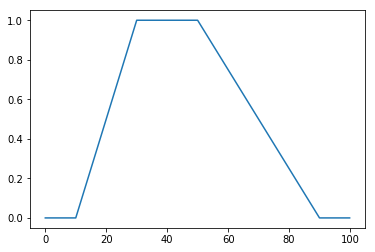

45.99999999999998
45.00000000000001
40.00000000000001


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
import skfuzzy as fuzz
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
x=np.arange(0,100,.1)
mu_a = fuzz.trapmf(x,[10,30,50,90])
ax.plot(x,mu_a)
# ax.plot(x,mu_old, label='old')
# plt.legend(loc='upper right',\
#            bbox_to_anchor=(1.68, 1.01),ncol=1)
plt.show()

zcoa=fuzz.defuzz(x,mu_a,'centroid')
print(zcoa)
zboa=fuzz.defuzz(x,mu_a,'bisector')
print(zboa)
zmom=fuzz.defuzz(x,mu_a,'mom')
print(zmom)

#### Problem 2 (Ch4-4):   
Repeat the previous exercise, but assume that the universe of discourse $X$ contains integers from 0 to 100.

**Solution:**
- Centroid of area $z_{\text{COA}}$:    
$$\begin{equation}
\begin{array}{lCL}
z_{\text{COA}} &=& \frac{\sum_{z=0}^{100}\mu_A(z)z}{\sum_{z=0}^{100}\mu_A(z)} \\
&=&\frac{\sum_{z=10}^{30}\frac{z^2-10z}{20}z}{\sum_{z=10}^{30}\frac{z^2-10z}{20}} + \frac{\sum_{z=30}^{50}z}{1} + \frac{{\sum_{z=50}^{90}\frac{90-z}{40}z}}{\sum_{z=50}^{90}\frac{90-z}{40}}\\
&=& 46
\end{array}
\end{equation}$$     
- Bisector of area $z_{\text{BOA}}$:   
$$\begin{equation}
\begin{array}{cCc}
\sum_{10}^{z_{\rm BOA}}\mu_A(z) {\rm d}z &=& \sum_{z_{\rm BOA}}^{90}\mu_A(z) {\rm d}z  \\
\sum_{10}^{30}\frac{z-10}{20} {\rm d}z  + \sum_{30}^{z_{\rm BOA}} 1 {\rm d}z &=& \sum_{z_{\rm BOA}}^{50} 1 {\rm d}z  + \int_{50}^{90} \frac{90-z}{40}{\rm d}z \\
\frac{0.5z^2-10z}{20}\bigg|_{10}^{30}  + z \bigg|_{30}^{z_{\rm BOA}} &=& z \bigg|_{z_{\rm BOA}}^{50} + \frac{90z-0.5z^2}{40}\bigg|_{50}^{90} \\
z_{\rm BOA} &=& 45
\end{array}
\end{equation}$$    
- Mean of maximum $z_{\text{MOM}}$:    
According to $\mu^*=\text{max}(\mu_A(z)) = 1$
$$z_{\text{MOM}} = \frac{30+50}{2}=40$$  
The results are calculated by using the python3 code which is shown in above.

#### Problem 3 (Ch4-6):   
Change the MFs in Example 4.2 to trapezoidal ones and plot the overall input-output surface.

**Solution:**    
The Matlab code for the problem is as part 1 with in the attached file `YQ_FS_HW3.mlx`. The plotting results are as follows in short.    

<div>
<left>
    <img src=".\fig\hw3-1.jpg" style="width: 50%;height: 50%"/>
</left>
</div>  

<div>
<left>
    <img src=".\fig\hw3-2.jpg" style="width: 50%;height: 50%"/>
</left>
</div> 


#### Problem 4 (Ch4-7):   
Modify Example 4.3 such that only constant terms are retained in the consequent. Repeat the plots in Figure 4.9.

**Solution:**      
The Sugeno fuzzy model can be expressed as:
$$\begin{equation}
\left\{
\begin{array}{}
\text{If } X \text{ is small then } Y=6.4 \\
\text{If } X \text{ is medium then } Y=4 \\
\text{If } X \text{ is large then } Y=-2
\end{array}
\right.
\end{equation}$$    
The Matlab code for the problem is as part 2 with in the attached file `YQ_FS_HW3.mlx`. The plotting results are as follows in short.    
 
<div>
<left>
    <img src=".\fig\hw3-3.jpg" style="width: 50%;height: 50%"/>
</left>
</div>  


#### Problem 5 (Ch4-8):   
Modify Example 4.3 by adding a second-order term to the consequent equation of each rule. Repeat the plots in Figure 4.9.

**Solution:**     
The Sugeno fuzzy model can be expressed as:
$$\begin{equation}
\left\{
\begin{array}{}
\text{If } X \text{ is small then } Y= 0.02X^2+0.1X+6.4 \\
\text{If } X \text{ is medium then } Y=0.03X^2-0.5X+4 \\
\text{If } X \text{ is large then } Y= -0.01X^2+X-2
\end{array}
\right.
\end{equation}$$      
The Matlab code for the problem is as part 3 with in the attached file `YQ_FS_HW3.mlx`. The plotting results are as follows in short.   

<div>
<left>
    <img src=".\fig\hw3-4.jpg" style="width: 50%;height: 50%"/>
</left>
</div> 